
Deep Learning: Assignment 1

    Take any different dataset (apart from breast cancer) that has target value binary (0 OR 1).
    Visualize the data using various graphs using matplotlib or sklearn python libraries.
    Transform data according to model requirements. HINT [MP-Neuron takes only BINARY DATA as input]
    Split the data for training and testing.
    Train MP-Neuron Model on the choosen dataset and test it on the testing set to get model accuracy.
    Train Perceptron Model on the choosen dataset and test it on the testing set to get model accuracy.



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample


In [ ]:
df = pd.read_csv('heart.csv')



In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()
# No Null Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
No_cols = df.columns.size
No_cols

14

In [ ]:
def Scaling(data):
    for j in range(No_cols-1):
        data[data.columns[j]] = data[data.columns[j]]/data[data.columns[j]].max()
    return(data)

In [ ]:
Scale_df = Scaling(df)

In [ ]:
df = Scale_df

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00,0.333333,1
1,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00,0.666667,1
2,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00,0.666667,1
3,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00,0.666667,1
4,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.740260,0.0,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00,1.000000,0
299,0.584416,1.0,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00,1.000000,0
300,0.883117,1.0,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50,1.000000,0
301,0.740260,1.0,0.000000,0.650,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25,1.000000,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.706056,0.683168,0.322332,0.658119,0.436638,0.148515,0.264026,0.740826,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.117949,0.466011,0.344017,0.087691,0.091898,0.356198,0.262930,0.113392,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.376623,0.000000,0.000000,0.470000,0.223404,0.000000,0.000000,0.351485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.616883,0.000000,0.000000,0.600000,0.374113,0.000000,0.000000,0.660891,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.714286,1.000000,0.333333,0.650000,0.425532,0.000000,0.500000,0.757426,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.792208,1.000000,0.666667,0.700000,0.486702,0.000000,0.500000,0.821782,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check whether the Dataset is balanced or not

In [ ]:
df["target"].value_counts()
# Data is Imbalanced

1    165
0    138
Name: target, dtype: int64

In [ ]:
class_0 = df[df['target'] == 0]
class_1 = df[df['target'] == 1]

In [ ]:
class_0_count,class_1_count = df.target.value_counts()

In [ ]:
print(class_0_count,class_1_count)

165 138


In [ ]:
class_1_overS = class_1.sample(class_0_count,replace = True)
# We can add random values from that class to over sample that dataset...But replace = True os required for over sampling
class_1_overS.shape

(165, 14)

In [ ]:
balanced_df = pd.concat([class_1_overS,class_0])
balanced_df.shape

(303, 14)

In [ ]:
df = balanced_df

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['target'])
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.1, random_state = 15)

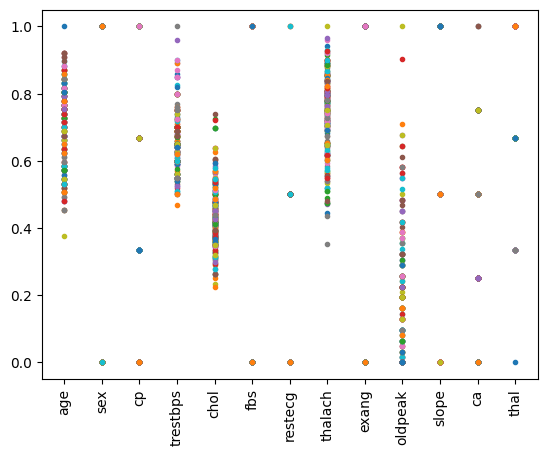

In [ ]:
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

Here We can see that how each feature is distributed over the intervel with respect to target.

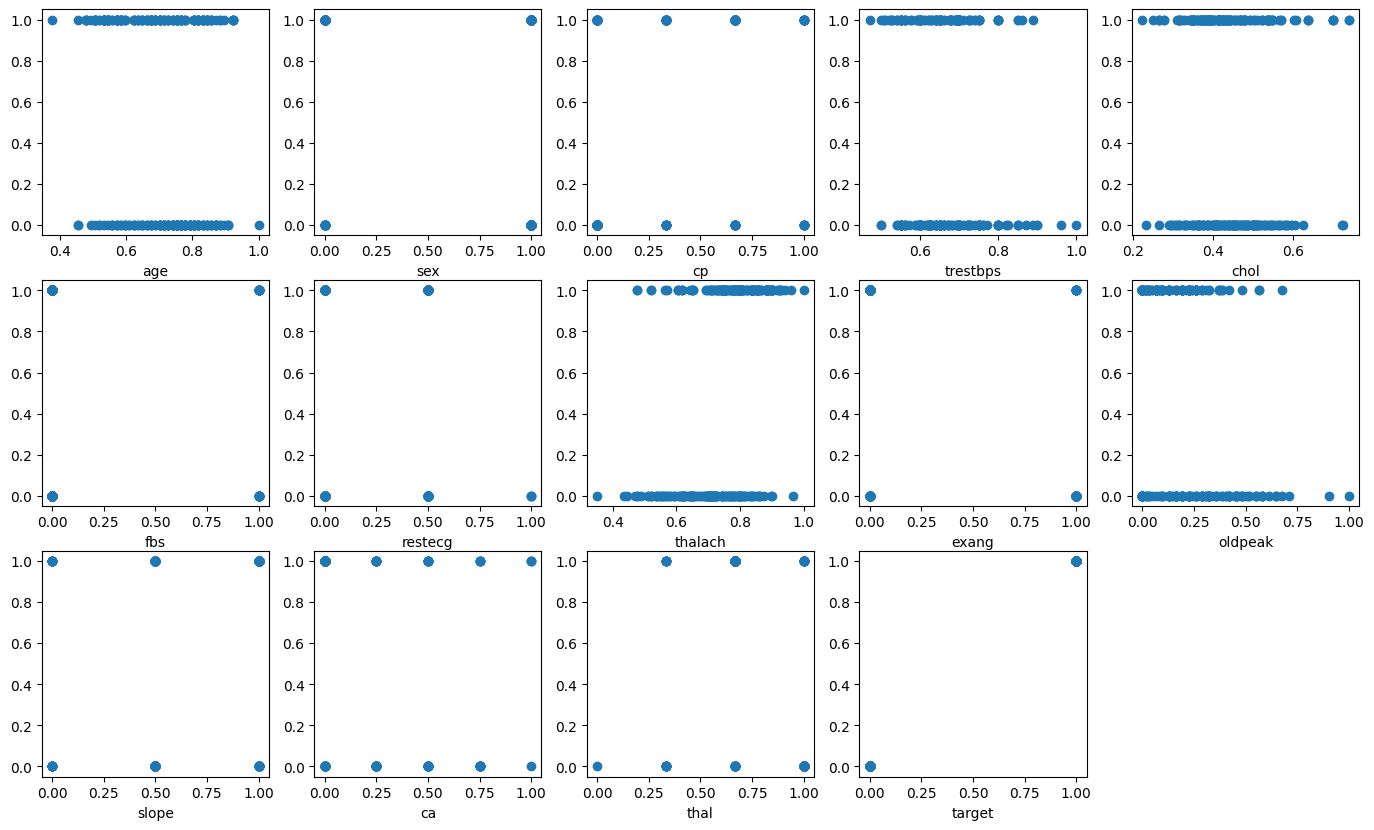

In [ ]:
plt.figure(figsize=(17,17))
for j in range(No_cols):
    plt.subplot(5,5,j+1)
    x = df[df.columns[j]]
    y = df['target']
    plt.scatter(x, y)
    plt.xlabel(df.columns[j])
# This Visualization shows that no any parameter in this dataset that can directly used for classification

We convert Inputs in to Binary values as MP-Neuron works only on Binary values

In [ ]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

pd.cut() Function used to convert continuous inputs to specific range here bins specifies the # of classes

In [ ]:
X_test = x_binarised_test.values
X_train = x_binarised_train.values

In [ ]:
X_train[0]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=object)

In [ ]:
for b in range(X_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train, y_train):
        y_pred = (np.sum(x) <= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_train.shape[0])

0 123 0.4522058823529412
1 123 0.4522058823529412
2 123 0.4522058823529412
3 123 0.4522058823529412
4 122 0.4485294117647059
5 124 0.45588235294117646
6 120 0.4411764705882353
7 115 0.4227941176470588
8 124 0.45588235294117646
9 129 0.4742647058823529
10 139 0.5110294117647058
11 146 0.5367647058823529
12 149 0.5477941176470589
13 149 0.5477941176470589


Here we choose B = 12 as it gives highest accuracy

In [ ]:
b = 12
y_pred_test = []
accurate_rows = 0

for x, y in zip(X_test, y_test):
    y_pred = (np.sum(x) <= b)
    y_pred_test.append(y_pred)
    accurate_rows += (y == y_pred)

print(b, accurate_rows, accurate_rows/X_test.shape[0])

12 16 0.5161290322580645


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

<Axes: >

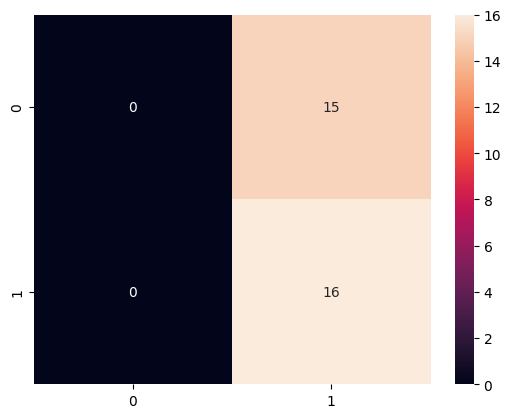

In [ ]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [ ]:
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.52      1.00      0.68        16

    accuracy                           0.52        31
   macro avg       0.26      0.50      0.34        31
weighted avg       0.27      0.52      0.35        31



In [ ]:
class MPNeuron:

    def __init__(self):
        self.b = None

    def model(self, x):
        return(sum(x) <= self.b)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b

        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train)

Optimal Value of  is 12
Highest accuracy is 0.5477941176470589


In [ ]:
predicted = mp_neuron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.5161290322580645


In [ ]:
class Perceptron:
# Globl variables weight and bias
    def __init__ (self):
        self.w = None
        self.b = None

# model
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if  y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print("Max Accuracy", max_accuracy)

        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()

Max Accuracy 0.8125


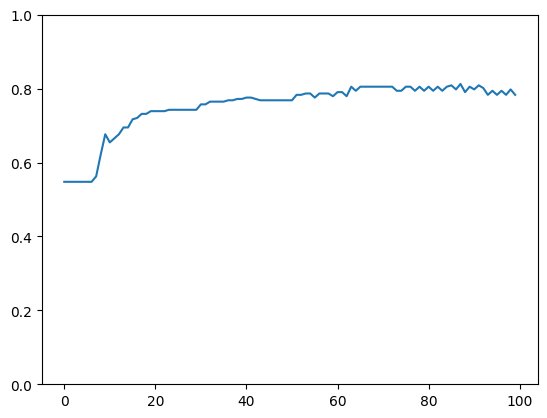

In [ ]:
perceptron =Perceptron()
perceptron.fit(X_train, y_train,100,0.001)

In [ ]:
predicted = perceptron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.7419354838709677


<Axes: >

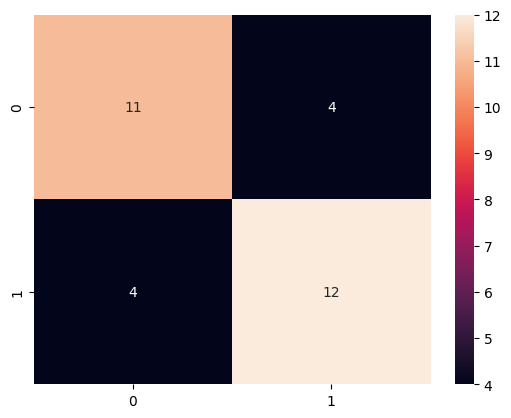

In [ ]:
cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm,annot=True)

In [ ]:

warnings.filterwarnings('ignore')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.52      1.00      0.68        16

    accuracy                           0.52        31
   macro avg       0.26      0.50      0.34        31
weighted avg       0.27      0.52      0.35        31

